# DIWASA <img align="right" src="../Supplementary_data/DE_Africa_Logo_Stacked_RGB_small.jpg">


* **Products used:** 
---

## Background

---

## Description

---

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell.

### Load packages

In [1]:
import datacube

from deafrica_tools.datahandling import load_ard
from deafrica_tools.plotting import rgb

### Connect to the datacube

In [2]:
dc = datacube.Datacube(app="DIWASA")

## Available products and measurements

### List products



In [3]:
# List Landsat products available in DE Africa
dc_products = dc.list_products()
display_columns = ['name', 'description']
dc_products[dc_products.name.str.contains(
    'iwmi').fillna(
        False)][display_columns].set_index('name')

,description
name,
iwmi_blue_et_monthly,Monthly Incremental Evapotranspiration (ET) fo...
iwmi_green_et_monthly,Monthly Rainfall Evapotranspiration (ET) for A...


### List measurements



In [4]:
dc_measurements = dc.list_measurements()
dc_measurements.loc['iwmi_blue_et_monthly']

,name,dtype,units,nodata,aliases,flags_definition,add_offset,scale_factor
measurement,,,,,,,,
data,data,float32,mm/month,-9999.0,NaN,NaN,NaN,NaN


## Load using `dc.load()`

In [5]:
# load data
ds_blue = dc.load(product="iwmi_blue_et_monthly",
             measurements=['data'],
             output_crs='EPSG:6933',
             y=(-3, 1),
             x=(31, 35),
             time=("2011-01", "2012-01"),
             resolution=(-1000, 1000),
             group_by="solar_day",
             )

ds_blue

<xarray.Dataset> Size: 10MB
Dimensions:      (time: 13, y: 511, x: 386)
Coordinates:
  * time         (time) datetime64[ns] 104B 2011-01-01 2011-02-01 ... 2012-01-01
  * y            (y) float64 4kB 1.275e+05 1.265e+05 ... -3.815e+05 -3.825e+05
  * x            (x) float64 3kB 2.992e+06 2.992e+06 ... 3.376e+06 3.376e+06
    spatial_ref  int32 4B 6933
Data variables:
    data         (time, y, x) float32 10MB 0.0 19.2 54.08 0.0 ... 25.81 0.0 0.0
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

### Plotting ET data

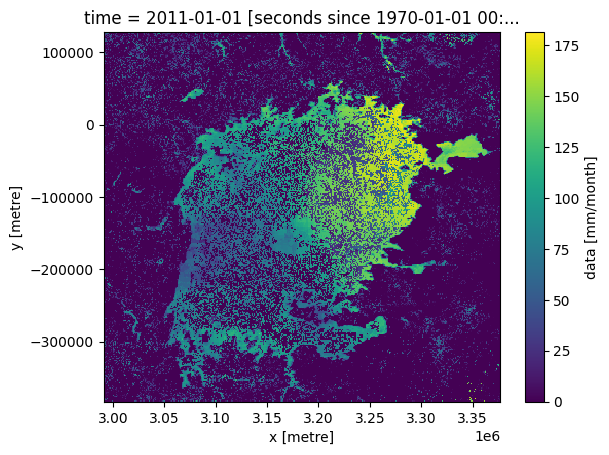

In [6]:
ds_blue.data.isel(time=0).plot()

In [7]:
# load data
ds_green = dc.load(product="iwmi_green_et_monthly",
             measurements=['data'],
             output_crs='EPSG:6933',
             y=(-3, 1),
             x=(31, 35),
             time=("2011-01", "2012-01"),
             resolution=(-1000, 1000),
             group_by="solar_day",
             )

ds_green

<xarray.Dataset> Size: 10MB
Dimensions:      (time: 13, y: 511, x: 386)
Coordinates:
  * time         (time) datetime64[ns] 104B 2011-01-01 2011-02-01 ... 2012-01-01
  * y            (y) float64 4kB 1.275e+05 1.265e+05 ... -3.815e+05 -3.825e+05
  * x            (x) float64 3kB 2.992e+06 2.992e+06 ... 3.376e+06 3.376e+06
    spatial_ref  int32 4B 6933
Data variables:
    data         (time, y, x) float32 10MB 71.0 55.8 42.92 ... 45.19 33.0 30.0
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

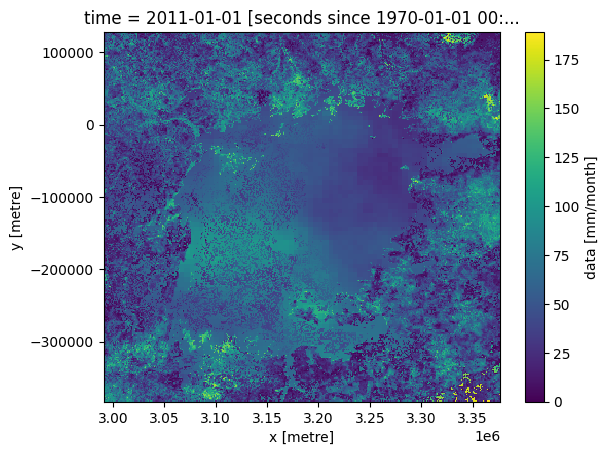

In [8]:
ds_green.data.isel(time=0).plot()

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:** 

In [9]:
print(datacube.__version__)

1.8.20


**Last Tested:**

In [10]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2025-02-25'